In [1]:

%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

In [2]:


crime = pd.read_excel('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')



In [3]:


crime.rename(columns = {
'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violent_crime',
'Unnamed: 3':'Murder_manslaughter','Unnamed: 4':'Rape_1',
'Unnamed: 5':'Rape_2','Unnamed: 6':'Robbery', 'Unnamed: 7':'Agg_assault',
'Unnamed: 8':'Property_crime', 'Unnamed: 9':'Burglary', 'Unnamed: 10': 'Larceny_theft',
'Unnamed: 11':'Motor_theft','Unnamed: 12':'Arson'
}, inplace = True)



In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 13 columns):
City                   355 non-null object
Population             349 non-null object
Violent_crime          349 non-null object
Murder_manslaughter    349 non-null object
Rape_1                 1 non-null object
Rape_2                 350 non-null object
Robbery                349 non-null object
Agg_assault            349 non-null object
Property_crime         349 non-null object
Burglary               349 non-null object
Larceny_theft          349 non-null object
Motor_theft            349 non-null object
Arson                  188 non-null object
dtypes: object(13)
memory usage: 36.1+ KB


In [5]:
crime['Population'] = pd.to_numeric(crime['Population'], errors='coerce')
crime['Violent_crime'] = pd.to_numeric(crime['Violent_crime'], errors='coerce')
crime['Murder_manslaughter'] = pd.to_numeric(crime['Murder_manslaughter'], errors='coerce')
crime['Rape_2'] = pd.to_numeric(crime['Rape_2'], errors='coerce')
crime['Robbery'] = pd.to_numeric(crime['Robbery'], errors='coerce')
crime['Agg_assault'] = pd.to_numeric(crime['Agg_assault'], errors='coerce')
crime['Property_crime'] = pd.to_numeric(crime['Property_crime'], errors='coerce')
crime['Burglary'] = pd.to_numeric(crime['Burglary'], errors='coerce')
crime['Larceny_theft'] = pd.to_numeric(crime['Larceny_theft'], errors='coerce')
crime['Motor_theft'] = pd.to_numeric(crime['Motor_theft'], errors='coerce')
crime['Arson'] = pd.to_numeric(crime['Arson'], errors='coerce')

In [6]:
crime = crime.fillna(crime.mean()) 

In [7]:
crime = crime.drop(['Rape_1'], axis=1)

In [8]:
crime = crime.drop(crime.index[0:4])

In [9]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 4 to 354
Data columns (total 12 columns):
City                   351 non-null object
Population             351 non-null float64
Violent_crime          351 non-null float64
Murder_manslaughter    351 non-null float64
Rape_2                 351 non-null float64
Robbery                351 non-null float64
Agg_assault            351 non-null float64
Property_crime         351 non-null float64
Burglary               351 non-null float64
Larceny_theft          351 non-null float64
Motor_theft            351 non-null float64
Arson                  351 non-null float64
dtypes: float64(11), object(1)
memory usage: 35.6+ KB


8396126.0

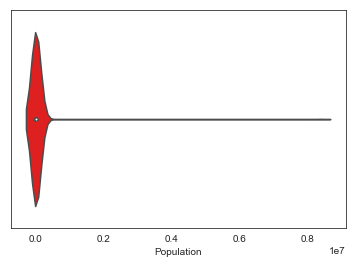

In [10]:

population = sns.violinplot(crime['Population'], color='r')
crime['Population'].max()

In [11]:
q25 = crime['Population'].quantile(0.25)
q75 = crime['Population'].quantile(0.75)
iqr = q75 - q25
maximum = q75 + (iqr * 1.5)
crime=crime.where(crime['Population'] < maximum)

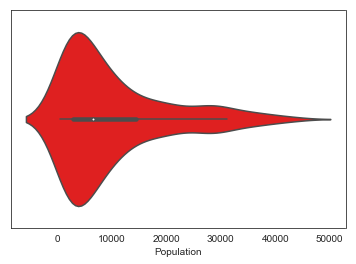

In [12]:
population = sns.violinplot(crime['Population'], color='red')


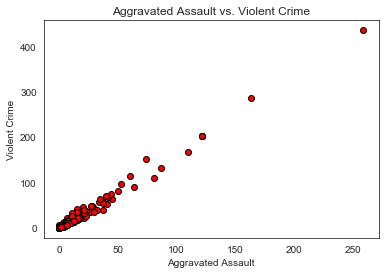

In [13]:
plt.scatter(y=crime['Violent_crime'], x=crime['Agg_assault'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Aggravated Assault')
plt.title('Aggravated Assault vs. Violent Crime')
plt.show()

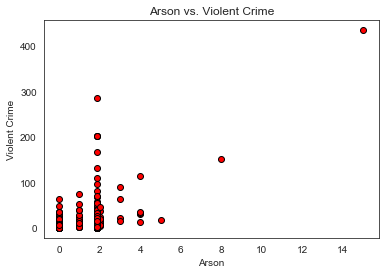

In [14]:
plt.scatter(y=crime['Violent_crime'], x=crime['Arson'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Arson')
plt.title('Arson vs. Violent Crime')
plt.show()

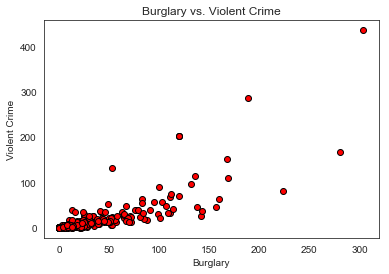

In [15]:
plt.scatter(y=crime['Violent_crime'], x=crime['Burglary'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Violent Crime')
plt.show()

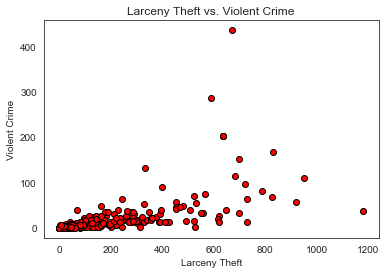

In [16]:
plt.scatter(y=crime['Violent_crime'], x=crime['Larceny_theft'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Larceny Theft')
plt.title('Larceny Theft vs. Violent Crime')
plt.show()

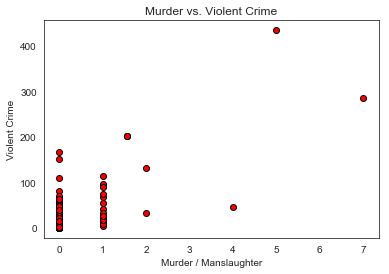

In [17]:
plt.scatter(y=crime['Violent_crime'], x=crime['Murder_manslaughter'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Murder / Manslaughter')
plt.title('Murder vs. Violent Crime')
plt.show()

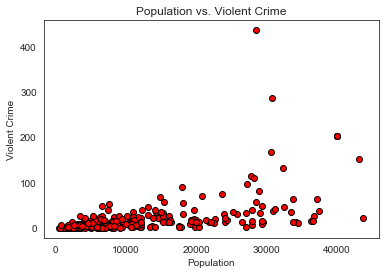

In [18]:
plt.scatter(y=crime['Violent_crime'], x=crime['Population'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Population')
plt.title('Population vs. Violent Crime')
plt.show()

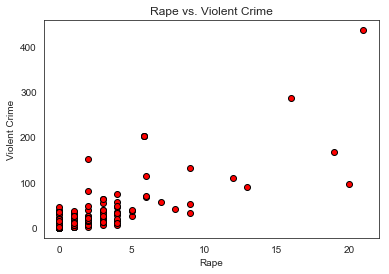

In [19]:
plt.scatter(y=crime['Violent_crime'], x=crime['Rape_2'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Rape')
plt.title('Rape vs. Violent Crime')
plt.show()

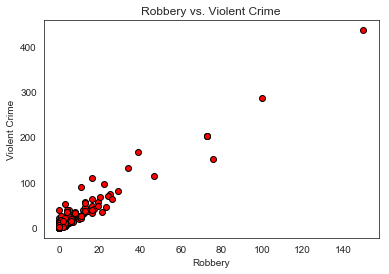

In [20]:
plt.scatter(y=crime['Violent_crime'], x=crime['Robbery'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Violent Crime')
plt.show()

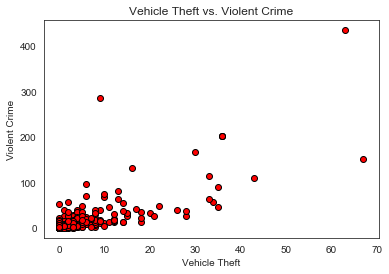

In [21]:
plt.scatter(y=crime['Violent_crime'], x=crime['Motor_theft'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Vehicle Theft')
plt.title('Vehicle Theft vs. Violent Crime')
plt.show()

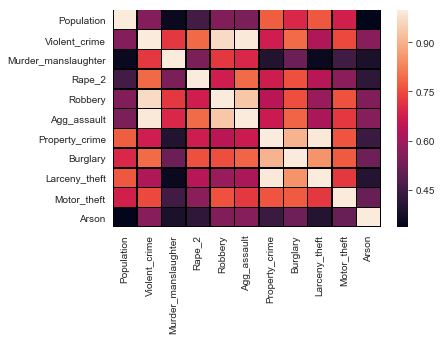

In [22]:
correlations = sns.heatmap(crime.corr(),linewidths=0.5,linecolor='black')


In [23]:
'''
crime['Population'] = crime['Population'].apply(lambda x: x/1000)
features = crime[['Violent_crime','Murder_manslaughter','Rape_2','Robbery','Agg_assault','Property_crime','Burglary','Larceny_theft','Motor_theft','Arson']]
feature_columns = list(features.columns)
for column in feature_columns:
    crime[column] = crime[column].apply(lambda x: x/crime['Population'])
crime = crime.dropna()
'''

"\ncrime['Population'] = crime['Population'].apply(lambda x: x/1000)\nfeatures = crime[['Violent_crime','Murder_manslaughter','Rape_2','Robbery','Agg_assault','Property_crime','Burglary','Larceny_theft','Motor_theft','Arson']]\nfeature_columns = list(features.columns)\nfor column in feature_columns:\n    crime[column] = crime[column].apply(lambda x: x/crime['Population'])\ncrime = crime.dropna()\n"

In [24]:
crime.head()


,City,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.000000
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.000000
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,1.871658


In [25]:
crime.describe()

,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,10325.166862,17.144844,0.144577,1.218560,4.847390,10.934317,200.126375,31.442885,163.870129,4.813361,1.169898
std,10037.223523,39.831554,0.612008,2.753639,13.903354,23.912327,246.240935,42.632408,202.212617,8.719425,1.326843
min,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2763.000000,1.000000,0.000000,0.000000,0.000000,1.000000,36.500000,6.000000,28.000000,0.000000,0.000000
50%,6582.000000,5.000000,0.000000,0.000000,1.000000,4.000000,99.000000,16.000000,81.000000,2.000000,1.871658
75%,14415.000000,16.500000,0.000000,1.000000,3.000000,11.000000,280.000000,40.500000,225.500000,5.000000,1.871658
max,43777.000000,435.000000,7.000000,21.000000,150.000000,259.000000,1353.000000,304.000000,1182.000000,67.000000,15.000000


In [26]:
crime['Murder_squared']=crime['Murder_manslaughter']**2
crime['Rape_squared']=crime['Rape_2']**2
crime['All_violence'] = crime['Agg_assault']+crime['Murder_manslaughter']+crime['Rape_2']+crime['Robbery']
crime['Burglary_squared'] = crime['Burglary']**2
crime['Motor_squared'] = crime['Motor_theft']**2
crime['All_property'] = crime['Burglary']+crime['Larceny_theft']+crime['Motor_theft']+crime['Arson']
crime['Violent_property'] = crime['All_violence']*crime['All_property']

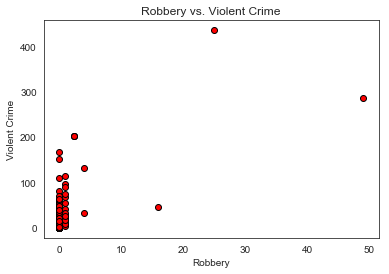

In [27]:
plt.scatter(y=crime['Violent_crime'], x=crime['Murder_squared'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Violent Crime')
plt.show()

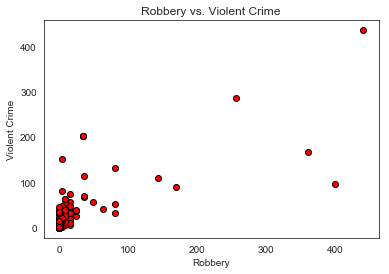

In [28]:
plt.scatter(y=crime['Violent_crime'], x=crime['Rape_squared'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Violent Crime')
plt.show()

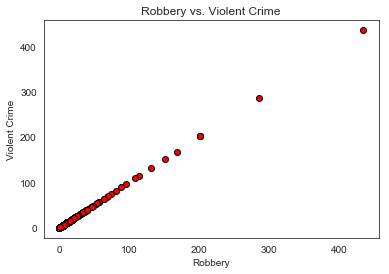

In [29]:
plt.scatter(y=crime['Violent_crime'], x=crime['All_violence'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Violent Crime')
plt.show()

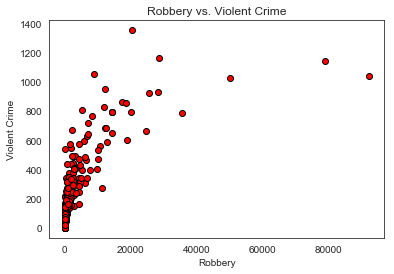

In [30]:
plt.scatter(y=crime['Property_crime'], x=crime['Burglary_squared'],c='r',edgecolors='k')
plt.ylabel('Violent Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Violent Crime')
plt.show()

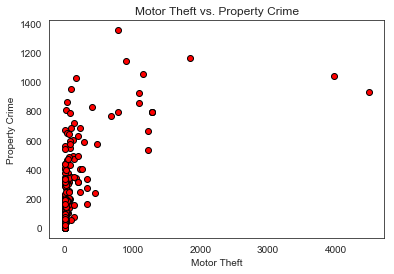

In [31]:
plt.scatter(y=crime['Property_crime'], x=crime['Motor_squared'],c='r',edgecolors='k')
plt.ylabel('Property Crime')
plt.xlabel('Motor Theft')
plt.title('Motor Theft vs. Property Crime')
plt.show()

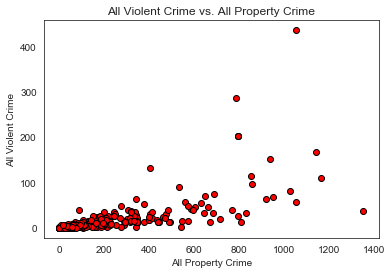

In [32]:
plt.scatter(y=crime['All_violence'], x=crime['All_property'],c='r',edgecolors='k')
plt.ylabel('All Violent Crime')
plt.xlabel('All Property Crime')
plt.title('All Violent Crime vs. All Property Crime')
plt.show()

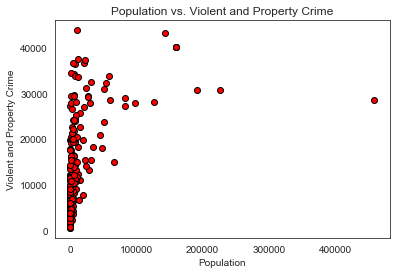

In [33]:
plt.scatter(y=crime['Population'], x=crime['Violent_property'],c='r',edgecolors='k')
plt.ylabel('Violent and Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Violent and Property Crime')
plt.show()

In [34]:
crime_2 = crime[['Murder_squared', 'Rape_squared', 'All_violence','Burglary_squared', 'Motor_squared', 'All_property', 'Violent_property']]

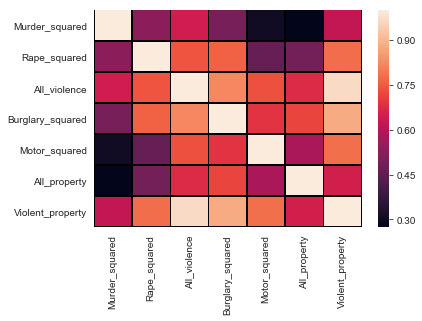

In [35]:
correlations = sns.heatmap(crime_2.corr(),linewidths=0.5,linecolor='black')


In [36]:
crime_3 = crime[['Population', 'Violent_crime', 'Murder_manslaughter', 'Rape_2', 'Robbery', 'Agg_assault', 'Property_crime', 'Burglary', 'Larceny_theft', 'Motor_theft', 'Arson', 'Murder_squared', 'Rape_squared', 'All_violence','Burglary_squared', 'Motor_squared', 'All_property', 'Violent_property']]

In [37]:
crime_3 = crime_3.dropna()
crime_3.head()

,Population,Violent_crime,Murder_manslaughter,Rape_2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_theft,Arson,Murder_squared,Rape_squared,All_violence,Burglary_squared,Motor_squared,All_property,Violent_property
4,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,12.000000,0.000000
5,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.000000,0.0,0.0,3.0,9.0,1.0,24.000000,72.000000
6,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.000000,0.0,0.0,3.0,1.0,0.0,16.000000,48.000000
8,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,1.871658,0.0,9.0,23.0,2809.0,25.0,224.871658,5172.048128
9,4089.0,5.0,0.0,0.0,3.0,2.0,46.0,10.0,36.0,0.0,1.871658,0.0,0.0,5.0,100.0,0.0,47.871658,239.358289


In [38]:
crime_3['All_violence_binary']=crime['All_violence'].apply(lambda x: 1 if x > crime['All_violence'].quantile(0.50) else 0)

In [39]:
X = crime_3
Y = crime_3['All_violence_binary']
blr = LogisticRegression(C=1e9)
fit = blr.fit(X, Y)
scores_blr = cross_val_score(blr, X, Y, cv=5)
score_blr = cross_val_score(blr, X, Y, cv=5).mean()
print('Coefficients: {}\n'.format(blr.coef_))
print('Cross-Validation Scores: {}\n'.format(scores_blr))
print('Average of Cross-Validation Scores Across Folds: {:.2%}.\n'.format(score_blr))

Coefficients: [[-7.68344158e-04 -8.28650414e-03 -9.12834724e-05  3.82743350e-04
  -3.74144452e-03 -4.83651950e-03 -1.74591742e-01 -3.16713243e-02
  -1.40092275e-01 -2.82814268e-03 -6.99433565e-03 -9.12852132e-05
   8.27080324e-04 -8.28650414e-03 -2.73525219e-04 -5.49675690e-03
  -1.81586078e-01  9.73975450e-02  6.81563610e-03]]

Cross-Validation Scores: [1.         0.98461538 0.984375   0.984375   1.        ]

Average of Cross-Validation Scores Across Folds: 99.07%.



In [40]:
# Define the training and test sizes.
trainsize = int(crime_3.shape[0] / 2)
df_test = crime_3.iloc[trainsize:, :].copy()
df_train = crime_3.iloc[:trainsize, :].copy()

# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train = df_train['All_violence'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin([crime_3])]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

origparams = np.append(regr1.coef_, regr1.intercept_)


ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)


# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['All_violence'])]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))




R-squared simple model:
1.0
0.9999995403259261
[-2.92372697e-07  4.31988236e-01  4.13033605e-02  1.21432866e-01
  1.32984509e-01  1.36267501e-01  1.04746858e-03  9.53999490e-04
 -1.12828837e-04  2.06297925e-04 -2.01037661e-03  4.13033605e-02
  5.97302949e-04  4.31988236e-01 -5.54256023e-06 -1.72306030e-06
 -9.62908016e-04  1.82600000e-06  7.35759798e-03]

R-squared complex model:
1.0


In [41]:


ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print(newparams)




0.9999985752608792
[-5.14730003e-07  7.60526918e-01  7.27156780e-02  2.13785830e-01
  2.34122807e-01  2.39902603e-01  1.84409664e-03  1.67954178e-03
 -1.98638203e-04  3.63193052e-04 -3.53932213e-03  7.27156780e-02
  1.05156792e-03 -9.75782648e-06 -3.03349403e-06 -1.69522549e-03
  3.21472216e-06  1.29532493e-02]


In [42]:
'''
print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)
'''

"\nprint('\nParameter Estimates for the same predictors for the small model'\n      'and large model:')\ncompare = np.column_stack((origparams, newparams))\nprettycompare = np.array2string(\n    compare,\n    formatter={'float_kind':'{0:.3f}'.format})\nprint(prettycompare)\n"

In [43]:
Y_train = crime_3['All_violence'].values.reshape(-1, 1)
X_train = crime_3.loc[:, ~(df_train.columns).isin(['All_violence'])]
X_train2 = crime_3.loc[:, ~(df_train.columns).isin(['All_violence'])]
Y_test = crime_3['All_violence'].values.reshape(-1, 1)
X_test = crime_3.loc[:, ~(df_test.columns).isin(['All_violence'])]
X_test2 = crime_3.loc[:, ~(df_test.columns).isin(['All_violence'])]


In [44]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.9999988315196933

Parameter estimates for the model with few features:
[ 2.57271436e-06  9.94717564e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.46998528e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.67681518e-06 -4.13947416e-05  0.00000000e+00
  6.37435520e-06  0.00000000e+00  1.19753274e-02]

R² for the model with many features:
0.9999988315196933

Parameter estimates for the model with many features:
[ 2.57271436e-06  9.94717564e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.46998528e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.67681518e-06 -4.13947416e-05  0.00000000e+00
  6.37435520e-06  0.00000000e+00  1.19753274e-02]


In [45]:
print(lass.score(X_test, Y_test))

print(lassBig.score(X_test2, Y_test))

0.9999988315196933
0.9999988315196933
